## Graphical Models and Expectation-Maximization

#### *18 November 2019*
#### *DATA 1010*

In [1]:
using Distributions, Plots, Random
gr(legend = false, ratio = 1, fillcolor = cgrad([:LightBlue, :SeaGreen, :Tomato]), size = (300, 300), ms = 2.5, msw = 0.2);

---

## Problem 1

Consider the following probabilistic narrative about an individual's health outcome. 

(i) A person becomes a smoker with probability 18%.  
(ii) They exercise regularly with probability 40% if they are a non-smoker or with probability 25% if they are a smoker.  
(iii) Independently of the above, with probability 15% they have a gene which predisposes them to lung cancer.  
(iv) Their probability of contracting lung cancer is given by $0.025 + 0.1I_1 - 0.02I_2 + 0.1I_3$, where $I_1$, $I_2$, and $I_3$ are the indicator random variables of the events described in (a), (b), and (c) respectively.

(a) Translate this story into a diagram in which each event of the four indicator random variables is a node, and arrows are drawn to indicate dependencies *as specified in the story*.

(b) Is this the only such diagram consistent with the specified probability measure on the four random variables?

(c) Find the marginal distribution of the exercise indicator. 

*Solution*. 

---

## Problem 2

The diagram above is called a **Bayesian network** or *Bayes Net*. The term *Bayesian* refers to the conditional probabilities depicted in the diagram, not Bayesian statistics. In fact, Bayes nets are compatible with either frequentist or Bayesian inference. 

Consider a distribution on $\mathbb{R}^n$ whose density function can be written as a linear combination of multivariate Gaussian densities. 

In [2]:
f(x,y) = 0.55pdf(MvNormal([2.2, -0.4], [0.4 0.2; 0.2 0.4]), [x,y]) +
         0.45pdf(MvNormal([0.1, -4.3], [1.5 -0.1; -0.1 0.5]), [x,y])

f (generic function with 1 method)

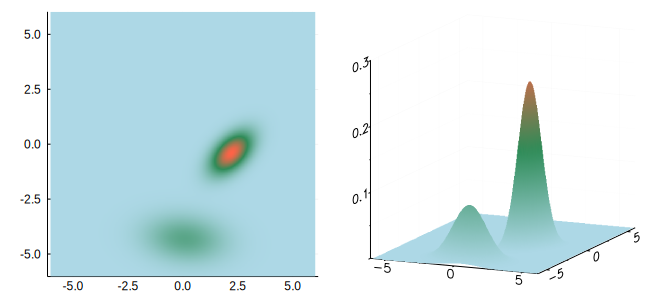

In [3]:
p1 = heatmap(-6:0.05:6, -6:0.05:6, f)
p2 = surface(-6:0.05:6, -6:0.05:6, f)
plot(p1, p2, size = (650, 300))

Come up with a Bayes Net one of whose nodes has this distribution as its marginal distribution. Hint: write a Julia function which samples from this distribution, and think about the hidden randomness you used inside the body of that function.

*Solution*. 

In [ ]:
function randpoint()
    if rand(Bernoulli(0.55))
        rand(MvNormal([2.2, -0.4], [0.4 0.2; 0.2 0.4]))
    else
        rand(MvNormal([0.1, -4.3], [1.5 -0.1; -0.1 0.5]))
    end
end
scatter([Tuple(randpoint()) for _ in 1:100], 
        xlims = (-6, 6), ylims = (-6,6))

---

## Problem 3

The model you described in Problem 2 is called a *Gaussian mixture model*. In this problem, we'll explore a (frequentist) numerical approach to doing inference on this model, called **Expectation-Maximization**. Next time, we'll see how this method generalizes to other Bayes nets.

We begin by pulling in some drawing functions from the script `ellipse.jl`. 

In [4]:
include("ellipse.jl")

mixtureplot (generic function with 2 methods)

Next, we sample a set of points from a made-up GMM:

In [5]:
Random.seed!(123);
n = 100
α = 0.4
𝒩₀ = MvNormal([1,1],[2.0 1.0; 1.0 2.0])
𝒩₁ = MvNormal([3.0,7.0],[1.5 0; 0 0.5])
X₁ = zeros(n)
X₂ = zeros(n)
Z = zeros(Bool,n)
for i=1:n
    Z[i] = rand(Bernoulli(α))
    X₁[i],X₂[i] = Z[i] ? rand(𝒩₁) : rand(𝒩₀)
end

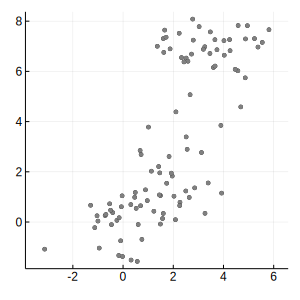

In [6]:
scatter(X₁, X₂, color = :gray)

We can pretty much use our visual cortex to identify where the mass sits for each of the two multivariate normal distributions in this scatter plot. In particular, we can mostly identify for each point which distribution it was probably sampled from. The EM algorithm is essentially a computable version of this intuition:

Since there is no analytic formula for the model parameters which maximize the likelihood of the observed data, we will instead take a numerical approach: we start with some random guess for the model parameters (including the distribution of $Z$ and the means and covariances of the Gaussians associated with each value of $Z$). 

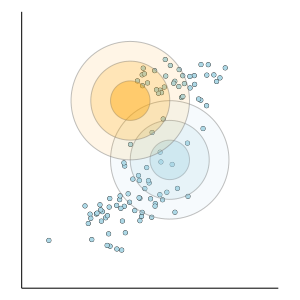

In [7]:
α = 0.6 
μ₀ = [3.0,3.0]
μ₁ = [1.0,6.0]
Σ₀ = 1.0*Matrix(I, 2, 2)
Σ₁ = 1.0*Matrix(I, 2, 2)
mixtureplot(X₁,X₂,μ₀,Σ₀,μ₁,Σ₁)

Next, we alternatingly update our estimate for the distribution of $Z$ and our estimates of the Gaussian parameters. Let's begin by updating the Gaussian parameters. 

Conceptually, we'd like to fit the blue distribution to the points kind of in the lower half of the figure, leaving the remaining upper points to be fit by the orange distribution. To this end, we come up with a score for each point indicating how much it seems to belong to the blue distribution or orange distribution, based on our current parameter estimates. More precisely, let's compute for each point its conditional probability of having $Z = 1$ (orange) given the $(x_1, x_2)$ value of the point. 

(a) Compute these values (conditional probability of being blue) for each point, and store the result in a vector called `Π`. 

In [ ]:
Π = 

Now we actually color each point according to how blue/orange it is according to this calculation. 

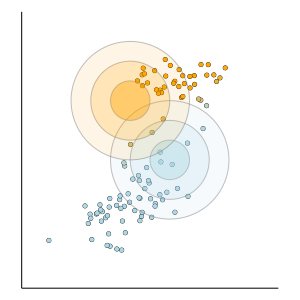

In [8]:
mixtureplot(X₁,X₂,μ₀,Σ₀,μ₁,Σ₁,Π)

Next, we can fit a multivariate Gaussian to the points we colored blue. However, rather than harshly rounding each point to blue or orange, we maintain the real-valued nature of the blueness/orangeness of each point, and instead compute a ______ mean and covariance (fill in the blank). 

(b) Carry out this update of the Gaussian parameters, and plot the result. 